<a href="https://colab.research.google.com/github/LilySu/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Lily_Su_Assignment12_LS_DS3_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
#descriptive statistics - summarize and showing data in meaningful way
#inferential statistics - draw conclusions and claims to population from sample 

In [0]:
from scipy import stats
# dir(stats)

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
#t oberservation requires you to tell it how many samples of data you have. 
#T distribution for small datasets have shorter tails.
# And a new friend - t
t1 = stats.t(100)  # 5 is df "shape" parameter <--- try different numbers here. rule of thumb - 30 observations
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.0101525445522108
1.0204081632653061


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [148]:
# TODO - during class, but please help!
lambda_heights = [72,72,65]
import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df.heights.mean()

69.66666666666667

In [149]:
# TODO - your code here!
import random
population = []

for _ in range(1000):
  population.append(random.choice([0, 1]))
  
print(population)
print(len(population))

[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 

In [150]:
sample = []

for _ in range(100):
  sample.append(random.choice([0, 1]))
  
print(sample)
print(len(sample))

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
100


In [151]:
import scipy
scipy.mean(population)

0.538

In [0]:
import numpy as np

# def mean(population):
#   average = np.sum(population)/len(population)
#   return average

# print('population mean:',mean(population))
# print('sample mean:',mean(sample))

In [153]:
df = pd.DataFrame({'likes_coke':sample})
df.head()
df.likes_coke.mean()

0.5

In [0]:
import numpy as np

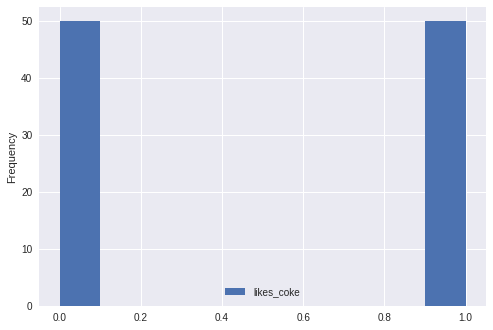

In [155]:
df.plot.hist()

In [156]:
df.likes_coke.describe()

count    100.000000
mean       0.500000
std        0.502519
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

In [157]:
mean(df.likes_coke)
df.likes_coke.mean()

0.5

In [158]:
sample = random.sample(population, 100)
print(sample)
print(len(sample))

[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0]
100


In [159]:
import scipy
#dir(scipy.stats)
scipy.stats.ttest_1samp(df['likes_coke'], mean(population))
#T statistic or p - value .05 or less to be statistically significant. 

#p-value,is the probability for a given statistical model that, 
#when the null hypothesis is true, the statistical summary 
#(such as the sample mean difference between two compared groups) 
#would be greater than or equal to the actual observed results.

#Artin: the t-stat is constructed by substituting the hypothesized 
#value of beta1 under the null hypo(zero), the estimated slope, and it’s standard error.

Ttest_1sampResult(statistic=-0.7561904522010319, pvalue=0.4513306714703431)

In [0]:
import numpy as np

In [161]:
def mean(list):
  average = np.sum(list)/len(list)
  return average

print("Population Mean:", mean(population))
print("Sample Mean:", mean(sample))

Population Mean: 0.538
Sample Mean: 0.51


In [162]:

def variance(list):#takes each value and subtracting mean
  return(np.sum((list-mean(list))**2)/(len(list)-1))#sample variance is always n-1 degrees of freedom
variance(df.likes_coke)
df.likes_coke.var()

0.25252525252525254

In [163]:

def variance(list):#average squared distance from data point and mean
  n=len(list)
  return np.sum((list-mean(list))**2)/(n-1)#-1 degree of freedom, freedom to choose any value, 
  #except last one, one observation that is locked down because this dataset has to have a certain mean.
  
variance(df.likes_coke)
df.likes_coke.var() #there is a difference between our variance function vs dataframe version n-1

0.25252525252525254

In [164]:
def stddev(list):
  var = variance(list)
  print(var)
  return np.sqrt(var)

stddev(df.likes_coke)

0.25252525252525254


0.502518907629606

In [165]:
def stddev(list):
  var = variance(list)
  return np.sqrt(var)

stddev(df.likes_coke)

0.502518907629606

In [0]:
#The T Statistic Equation
#x bar (sample mean) - miu (null hypothesis or population mean)/standard deviation / square root of # of our observations
#sample mean - null hypothesis, might be .5 if we don't know mean, the null hypothesis also called "boring hypothesis" the thing is not interesting if our mean is not different from it. no different between two.

In [167]:
n=len(df.likes_coke)
t_stat = (mean(df.likes_coke) - mean(population))/(stddev(df.likes_coke)/n**(1/2))
print(t_stat)

-0.7561904522010319


In [170]:
scipy.stats.ttest_1samp(df['likes_coke'], mean(population))

Ttest_1sampResult(statistic=-0.7561904522010319, pvalue=0.4513306714703431)

\begin{align}
t=\frac{\text{variance between groups}}{\text{variance within groups}}
\end{align}

In [0]:
#how spread apart are the population from the sample/ standard deviation within our group

In [0]:
#https://rpsychologist.com/d3/tdist/
#qantile quantile plot shows relationship between normal vs t statistics in order to achieve the same std from mean
#when normal distribution is 2 standard deviations away, the t distribution is about 2.5 left column

In [0]:
#we decide if we want to do a 1tail or 2 tail t test, we calculate the area of curve under bell curve
# then we get statistical significance number
#sometimes we compare sample to population
#sometimes we compare sample to sample
#t different between two groups variance / spread given sample size, or cummulative spread of samples.
#high t - variance spread out compared 

In [0]:
#t-score good for comparing just mean, 
#smaller the sample size, the higher the tstatistic, you need up to 30. 

In [0]:
#when is it appropriate to use 1 or 2 tailed t-tests

In [0]:
#confidence interval = statistic +- Z* margin of error(z score distance away from mean), 
#multiplied by standard deviation of the statistic

#confidence interval = statistic +- population standard deviation of sampling distribution, but we estimate with standard error of statistic
#x + t*(s/sqrt(n)) sample standard deviation/square root of sample size
#sample mean +- z sample standard deviation/ square root of sample size. - z sample underestimates interval
#t table when you don't know standard deviation of population but you have sample
#sample mean x, +- t* sample mean/square root of sample. 
#when we compute confidence interval over and over again, we get closer and closer to standard deviation of population mean. 

#simple random sample srs
#if your sample is less than 10% of the population, individual observtions are considered independent

In [0]:
#A TWO TAILED T-TEST - two samples to each other. Difference in means of our two groups
# one variable equation represents sample to null hypothesis
#numerator - variance or spread between group
#denominator (bottom) - variance or spread of a group given the spread of a given group or groups
#mean small - results are close together

In [0]:
#t statistic - only good for comparing means between 2 groups
#t statistics around 2 for both z scores

In [0]:
#p-hacking taking only hypothesis that are significant to publish unless p value very small
#take with a grain of salt, look for reproducability

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
#null hypothesis - they vote the same. 

In [0]:
#when is it appropriate to use a 1 tailed vs 2 tailed T-tests

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars

In [0]:
congressional_Voting_R = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')

In [183]:
congressional_Voting_R.head(3)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y


In [0]:
import numpy as np

In [185]:
# congressional = congressional_Voting_R.replace('?', 0)
# congressional.head(3)
congressional_V = congressional_Voting_R.replace('?', np.nan)
congressional_V.head(3)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y


In [186]:
congressional = congressional_V.dropna()
congressional.head(3)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y


In [187]:
congressional.shape

(232, 17)

In [188]:
con = congressional.replace({'n': 0, 'y': 1})
con.head(3)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
18,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1


In [0]:
con.columns = ['party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras','mx-missile', 'immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

In [190]:
con.T

,4,7,18,22,24,25,26,27,28,29,...,417,418,419,420,421,422,425,426,429,430
party,democrat,republican,democrat,democrat,democrat,democrat,democrat,republican,democrat,republican,...,democrat,democrat,republican,democrat,democrat,democrat,democrat,republican,republican,democrat
handicapped-infants,0,0,1,1,1,1,1,1,1,0,...,1,1,1,0,0,0,1,0,0,0
water-project-cost-sharing,1,1,1,1,0,0,1,0,1,1,...,1,1,1,1,0,1,0,0,0,0
adoption-of-the-budget-resolution,1,0,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,1,0,1,1
physician-fee-freeze,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
el-salvador-aid,1,1,0,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,1,0
religious-groups-in-schools,1,1,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,1,1,0
anti-satellite-test-ban,0,0,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
aid-to-nicaraguan-contras,0,0,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
mx-missile,0,0,1,1,1,1,1,1,1,0,...,0,1,0,0,1,1,1,0,1,1


In [191]:
dem = con[con['party']=='democrat']
rep = con[con['party']=='republican']
dem.head(3)
#create new dataframe by political party

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
18,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
22,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1


In [192]:
dem.shape, rep.shape

((124, 17), (108, 17))

In [193]:
dem_f = dem.iloc[0:50]
dem_f.shape
#sample only a selection for each party. each party has the same amount of samples

(50, 17)

In [194]:
rep_f = dem.iloc[0:50]
rep_f.shape

(50, 17)

In [207]:
physall = con['physician-fee-freeze'].tolist()
print(mean(physall))
waterall = con['water-project-cost-sharing'].tolist()
print(mean(waterall))
budall = con['adoption-of-the-budget-resolution'].tolist()
print(mean(budall))
#convert both parties together on an issue to list

0.4870689655172414
0.46120689655172414
0.5301724137931034


In [222]:
phys = dem['physician-fee-freeze'].tolist()
print(phys)
physr = rep['physician-fee-freeze'].tolist()
print(physr)
watersharedem = dem['water-project-cost-sharing'].tolist()
print(watersharedem)
watersharerep = rep['water-project-cost-sharing'].tolist()
print(watersharerep)
budd = dem['adoption-of-the-budget-resolution'].tolist()
print(budd)
budr = rep['adoption-of-the-budget-resolution'].tolist()
print(budr)
#convert separate parties on issues to list

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1

# Answer for Question 4

In [213]:
#physician-fee-freeze democrats
allvalues = mean(physall)#set total mean to be for all the parties on this topic
scipy.stats.ttest_1samp(dem['physician-fee-freeze'], allvalues)

Ttest_1sampResult(statistic=-22.67291171204809, pvalue=9.416626698577651e-46)

In [214]:
#physician-fee-freeze republicans
scipy.stats.ttest_1samp(rep['physician-fee-freeze'], allvalues)

Ttest_1sampResult(statistic=54.396551724137936, pvalue=8.596864738425612e-80)

In [215]:
#watersharedem democrats
allvalues = mean(waterall)
scipy.stats.ttest_1samp(dem['water-project-cost-sharing'], allvalues)

Ttest_1sampResult(statistic=-0.21380860651532796, pvalue=0.831050331348797)

In [216]:
#watersharedem republicans
scipy.stats.ttest_1samp(rep['water-project-cost-sharing'], allvalues)

Ttest_1sampResult(statistic=0.22823932283101167, pvalue=0.8198958010344828)

#Answer for Question 2

In [218]:
#watersharedem democrats
allvalues = mean(budall)
scipy.stats.ttest_1samp(dem['adoption-of-the-budget-resolution'], allvalues)

Ttest_1sampResult(statistic=10.221679554446855, pvalue=3.961800609599312e-18)

#Answer for Question 3

In [219]:
#watersharedem republicans
scipy.stats.ttest_1samp(rep['adoption-of-the-budget-resolution'], allvalues)

Ttest_1sampResult(statistic=-10.587797423175429, pvalue=2.37430441349451e-18)

In [220]:
c = con.groupby(['party']).mean()
c.head(3)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
party,,,,,,,,,,,,,,,,
democrat,0.588710,0.451613,0.854839,0.048387,0.201613,0.443548,0.766129,0.830645,0.790323,0.532258,0.508065,0.129032,0.290323,0.346774,0.596774,0.943548
republican,0.212963,0.472222,0.157407,0.990741,0.953704,0.870370,0.268519,0.148148,0.138889,0.574074,0.157407,0.851852,0.842593,0.981481,0.111111,0.666667


In [221]:
diff = c.loc['democrat']-c.loc['republican']
diff.sort_values()
#more positive democrats,
#more negative, republicans
#guidance for selecting which feature to find p.values

physician-fee-freeze                     -0.942354
el-salvador-aid                          -0.752091
education-spending                       -0.722820
crime                                    -0.634707
superfund-right-to-sue                   -0.552270
religious-groups-in-schools              -0.426822
immigration                              -0.041816
water-project-cost-sharing               -0.020609
export-administration-act-south-africa    0.276882
synfuels-corporation-cutback              0.350657
handicapped-infants                       0.375747
duty-free-exports                         0.485663
anti-satellite-test-ban                   0.497611
mx-missile                                0.651434
aid-to-nicaraguan-contras                 0.682497
adoption-of-the-budget-resolution         0.697431
dtype: float64

  #physician-fee-freeze democrats
  n=len(phys)
  t_stat = (mean(phys) - allvalues)/(stddev(phys)/n**(1/2))
  print('physician-fee-freeze t stat:')
  print(t_stat)
  scipy.stats.ttest_1samp(phys, .5)

In [0]:
#education-spending

In [0]:
# def simulate(n):
#   return cong({'crime': np.random.choice([0,1], size = n, p=[0.5, 0.5])})

In [0]:
# list2 = simulate(434).crime.value_counts()
# print(list2)